In [1]:
import numpy as np
import pandas as pd
!pip install tabulate
from tabulate import tabulate

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [18]:
def generate_table(data):
    headers = [
        #"\\textbf{N}", 
        "\\textbf{Data}", 
        "\\textbf{Name}", 
        "\\textbf{Company}", 
        "\\textbf{Role}", 
        "\\textbf{Segment}", 
        "\\textbf{Telephone}",
        "\\textbf{Email}", 
        "\\textbf{Linkedin}", 
        "\\multicolumn{2}{c}{\\textbf{Assumption}}",
        "\\textbf{Insights}", 
        "\\textbf{Contacts}"
    ]

    rows = []
    for row in data:
        date, name, company, role, segment, telephone, email, linkedin, validated_assumptions, invalidated_assumptions, insights, contacts = row

        # Split names
        name_surname = name.split(" ")
        name = " \\\\ ".join(name_surname[:len(name_surname)])
        
        # Split telephone
        telephone_lines = telephone.split(", ")
        telephone = " \\\\ ".join(telephone_lines[:len(telephone_lines)])

        # Split contacts 
        contacts_line = contacts.split(", ")
        contacts = " \\\\ ".join(contacts_line[:len(contacts_line)])
            
        # Split insights
        insights_line = insights.split("; ")
        insights = " \\\\ ".join(insights_line[:len(insights_line)])
            
        rows.append([
            #f"{num}",
            f"{date}",
            f"\\begin{{tabular}}[c]{{@{{}}c@{{}}}}{name}\\end{{tabular}}",
            f"{company}",
            f"{role}",
            f"{segment}",
            f"\\begin{{tabular}}[c]{{@{{}}c@{{}}}}{telephone}\\end{{tabular}}",
            f"{email}",
            f"{linkedin}",
            f"\\begin{{tabular}}[c]{{@{{}}c@{{}}}}{validated_assumptions}\\end{{tabular}}",
            f"\\begin{{tabular}}[c]{{@{{}}c@{{}}}}{invalidated_assumptions}\\end{{tabular}}",
            f"\\begin{{tabular}}[c]{{@{{}}c@{{}}}}{insights}\\end{{tabular}}",
            f"\\begin{{tabular}}[c]{{@{{}}c@{{}}}}{contacts}\\end{{tabular}} \\\\"
        ])

    table = tabulate(rows, headers, tablefmt="latex_raw", colalign=("center",))

    # Add hline after headers
    table = table.replace("\\\\", "\\hline\n", 1)

    # Add multirows
    for i in range(1, len(rows)*3, 3):
        replace_str = f" {i} & "
        multirow_str = f" \\multirow{{3}}{{*}}{{{i//3+1}}} & "
        table = table.replace(replace_str, multirow_str, 1)
    
    # Remove the & in front of \textbf{Data}
    table = table.replace("& \\textbf{Data}", "\\textbf{Data}", 1)
    
    # Add \\ after \textbf{Contacts}
    table = table.replace("\\textbf{Contacts}", "\\textbf{Contacts} \\\\", 1)
    
    # Replace l with c
    table = table.replace("\\begin{tabular}{clllllllllll}", "\\begin{tabular}{cccccccccccc}", 1)
    
    # Add sidewaystable environment
    table = "\\begin{sidewaystable}[htbp]\n" + table
    table += "\\caption{HPCs = HPC specialist, SPRS = Senior Principal Research Scientist, PL = Project Leader, SPL = Senior Project Leader, RF = Research Fellow, CE = Chief Executive Officer, EM = Enterprise Manager, GL = Group Leader, DD = Deputy Director, CTO = Chief Technology Officer)}\\label{tab:data-structures}"
    table += "\n\\end{sidewaystable}"
    
    # Remove \hline after \end{tabular}
    table = table.replace("\\end{tabular}\n\\hline", "\\end{tabular}")
    
    return table

# Example data
data = [
    [   #"1",
        "19/04/24",
        "Daniel Liang",
        "CSIRO", # Manufacturing,
        "SPRS, SPL",
        "Research Center",
        "0395452981, 0407198957",
        "daniel.liang@csiro.au",
        "\\href{https://www.linkedin.com/in/daniel-liang-a97a495a}{linkedin}",
        "\\textbf{\\textcolor{green}{Validate}}\\\\ \\\\ ",
        "\\textbf{\\textcolor{red}{Invalidate}}\\\\ \\\\ ",
        "\\\\ \\\\ ",
        "Lu Yannan, Ritaban Dutta"
    ],
    [   #"2",
        "19/04/24",
        "Massimiliano Nardini",
        "UniMelb",
        "RF",
        "Univerisity",
        "+393407297092",
        "massimiliano.nardini@unimelb.edu.au",
        "\\href{https://www.linkedin.com/in/massimiliano-nardini}{linkedin}",
        "\\\\ \\\\ ",
        "\\\\ \\\\ ",
        "\\\\ Coding complexity\\\\ ",
        "N/A"
    ],
    [   #"3",
        "19/04/24",
        "Melissa Kozul",
        "UniMelb",
        "RF",
        "Univerisity",
        "0421941387",
        "kozulm@unimelb.edu.au",
        "\\href{https://www.linkedin.com/in/melissa-kozul-49858827}{linkedin}",
        "\\\\ \\\\ ",
        "\\\\ \\\\ ",
        "\\\\ Simulation cost\\\\ ",
        "N/A"
    ],
    [   #"4", 
        "19/04/24",
        "James Stewart",
        "Always Carbon",
        "CEO",
        "Private Company",
        "0401804031",
        "N/A",
        "\\href{https://www.linkedin.com/in/james-stewart-a38626}{linkedin}",
        "\\\\ \\\\ ",
        "\\\\ \\\\ ",
        "Position the software; Plug-in strategy; Purple Cow",
        "N/A"
    ],
    [   #"5",
        "19/04/24",
        "Peter Kambouris",
        "CSIRO",
        "EM",
        "Research Center",
        "0401804031",
        "peter.kambouris@csiro.au",
        "\\href{https://linkedin.com/in/peter-kambouris-99bbb01}{linkedin}",
        "\\\\ \\\\ ",
        "\\\\ \\\\ ",
        "3x benefit: noted; 10x benefit: competitive; what 'benefit' means; compare with competitors; 3 ppl per Co: CEO/tech/advisor; which resolution for the problem; quality/quantity metrics; read reports",
        "Nick Carter, Mark Cheung"
    ],
    [   #"6",
        "N/A",
        "Nick Carter",
        "CSIRO",
        "GL",
        "Research Center",
        "0864368614, 0467964895",
        "nick.carter@csiro.au",
        "\\href{https://linkedin.com/in/nick-carter-64bb1470}{linkedin}",
        "\\\\ \\\\ ",
        "\\\\ \\\\ ",
        "",
        ""
    ],
    [   #"7",
        "N/A",
        "Mark Cheung",
        "CSIRO",
        "DD",
        "Research Center",
        "0476870853",
        "mark.cheung@csiro.au",
        "\\href{https://linkedin.com/in/mcmcheung}{linkedin}",
        "\\\\ \\\\ ",
        "\\\\ \\\\ ",
        "",
        ""
    ],
    [   #"8",
        "23/04/24",
        "Joni Sytsma",
        "iLAuNCH",
        "CTO",
        "Government",
        "0499285639",
        "joni.sytsma@outerloop.au",
        "\\href{https://linkedin.com/in/joni-sytsma}{linkedin}",
        "\\\\ \\\\ ",
        "\\\\ \\\\ ",
        "Unique value proposition; product replacement theory; what we got, where we are at, what customers need; CART3D; Ansys; Memko; Leap Australia",
        "Michael Smart"
    ],
    [   #"9",
        "29/04/24",
        "Andrew Savchenko",
        "Team 3",
        "MD",
        "Private Company",
        "0466955925",
        "andrew@team3.au",
        "\\href{https://linkedin.com/in/andrew-savchenko}{linkedin}",
        "\\\\ \\\\ ",
        "\\\\ \\\\ ",
        "",
        ""
    ],
    [   #"10",
        "26/04/24",
        "Antonio Memmolo",
        "CINECA",
        "HPCs",
        "Research Center",
        "+393202653151",
        "antonio.memmolo@gmail.com",
        "\\href{https://linkedin.com/in/antonio-memmolo}{linkedin}",
        "\\\\ \\\\ ",
        "\\\\ \\\\ ",
        "",
        ""
    ],
    [   #"11",
        "26/04/24",
        "Simone Colonia",
        "Airbus",
        "PL",
        "Research Institute",
        "+447769298326",
        "colonia.simone@gmail.com",
        "\\href{https://linkedin.com/in/dr-simone-colonia-314104136}{linkedin}",
        "\\\\ \\\\ ",
        "\\\\ \\\\ ",
        "",
        ""
    ],
    [   #"12",
        "30/04/24",
        "Stephanie Smith",
        "CSIRO",
        "GL",
        "Research Center",
        "0293724131, 0460017782",
        "stephanie.smith@csiro.au",
        "\\href{https://linkedin.com/in/stephanie-smith-b90451a9}{linkedin}",
        "\\\\ \\\\ ",
        "\\\\ \\\\ ",
        "",
        ""
    ]
]

# Generate the table
latex_table = generate_table(data)

# Print the LaTeX code
print(latex_table)

# Write the LaTeX code to a .tex file
with open("python2latextable.tex", "w") as f:
    f.write(latex_table)

print("Table exported to 'python2latextable.tex'")

# Define column names
columns = ['date', 'name', 'company', 'role', 'segment', 'telephone', 'email', 'linkedin', 'validated assumptions', 'invalidated assumptions', 'insights', 'contacts']

# Create DataFrame with specified column names
df = pd.DataFrame(data, columns=columns)

# Count the number of unique segments
unique_segments = df['segment'].nunique()
print("Number of segments:", unique_segments)

df

\begin{sidewaystable}[htbp]
\begin{tabular}{cccccccccccc}
\hline
          \textbf{Data}                                                   & \textbf{Name}   & \textbf{Company}   & \textbf{Role}      & \textbf{Segment}                                                 & \textbf{Telephone}                  & \textbf{Email}                                                       & \textbf{Linkedin}                                                                  & \multicolumn{2}{c}{\textbf{Assumption}}                                            & \textbf{Insights}                                                                                                                                                                                                                                           & \textbf{Contacts} \\                                                     \hline

\hline
 19/04/24 & \begin{tabular}[c]{@{}c@{}}Daniel \\ Liang\end{tabular}         & CSIRO           & SPRS, SPL      

,date,name,company,role,segment,telephone,email,linkedin,validated assumptions,invalidated assumptions,insights,contacts
0,19/04/24,Daniel Liang,CSIRO,"SPRS, SPL",Research Center,"0395452981, 0407198957",daniel.liang@csiro.au,\href{https://www.linkedin.com/in/daniel-liang...,\textbf{\textcolor{green}{Validate}}\\ \\,\textbf{\textcolor{red}{Invalidate}}\\ \\,\\ \\,"Lu Yannan, Ritaban Dutta"
1,19/04/24,Massimiliano Nardini,UniMelb,RF,Univerisity,+393407297092,massimiliano.nardini@unimelb.edu.au,\href{https://www.linkedin.com/in/massimiliano...,\\ \\,\\ \\,\\ Coding complexity\\,N/A
2,19/04/24,Melissa Kozul,UniMelb,RF,Univerisity,0421941387,kozulm@unimelb.edu.au,\href{https://www.linkedin.com/in/melissa-kozu...,\\ \\,\\ \\,\\ Simulation cost\\,N/A
3,19/04/24,James Stewart,Always Carbon,CEO,Private Company,0401804031,N/A,\href{https://www.linkedin.com/in/james-stewar...,\\ \\,\\ \\,Position the software; Plug-in strategy; Purpl...,N/A
4,19/04/24,Peter Kambouris,CSIRO,EM,Research Center,0401804031,peter.kambouris@csiro.au,\href{https://linkedin.com/in/peter-kambouris-...,\\ \\,\\ \\,3x benefit: noted; 10x benefit: competitive; w...,"Nick Carter, Mark Cheung"
5,N/A,Nick Carter,CSIRO,GL,Research Center,"0864368614, 0467964895",nick.carter@csiro.au,\href{https://linkedin.com/in/nick-carter-64bb...,\\ \\,\\ \\,,
6,N/A,Mark Cheung,CSIRO,DD,Research Center,0476870853,mark.cheung@csiro.au,\href{https://linkedin.com/in/mcmcheung}{linke...,\\ \\,\\ \\,,
7,23/04/24,Joni Sytsma,iLAuNCH,CTO,Government,0499285639,joni.sytsma@outerloop.au,\href{https://linkedin.com/in/joni-sytsma}{lin...,\\ \\,\\ \\,Unique value proposition; product replacement ...,Michael Smart
8,29/04/24,Andrew Savchenko,Team 3,MD,Private Company,0466955925,andrew@team3.au,\href{https://linkedin.com/in/andrew-savchenko...,\\ \\,\\ \\,,
9,26/04/24,Antonio Memmolo,CINECA,HPCs,Research Center,+393202653151,antonio.memmolo@gmail.com,\href{https://linkedin.com/in/antonio-memmolo}...,\\ \\,\\ \\,,


In [4]:
# def generate_table(data):
#     headers = [
#         "\\textbf{Data}", 
#         "\\textbf{Name}", 
#         "\\textbf{Company}", 
#         "\\textbf{Role}", 
#         "\\textbf{Telephone}",
#         "\\textbf{Email}", 
#         "\\textbf{Linkedin}", 
#         "\\multicolumn{2}{c}{\\textbf{Assumption}}",
#         "\\textbf{Insights}", 
#         "\\textbf{Contacts}"
#     ]

#     rows = []
#     for row in data:
#         date, name, company, role, telephone, email, linkedin, validated_assumptions, invalidated_assumptions, insights, contacts = row
        
#         # Split telephone numbers into two lines
#         telephone_lines = telephone.split(", ")
#         if len(telephone_lines) == 2:
#             telephone = f"{telephone_lines[0]} \\\\ {telephone_lines[1]}"
            
#         rows.append([
#             f"{date}",
#             f"{name}",
#             f"{company}",
#             f"{role}",
#             f"\\begin{{tabular}}[c]{{@{{}}c@{{}}}}{telephone}\\end{{tabular}}",
#             f"{email}",
#             f"{linkedin}",
#             f"\\begin{{tabular}}[c]{{@{{}}c@{{}}}}{validated_assumptions}\\end{{tabular}}",
#             f"\\begin{{tabular}}[c]{{@{{}}c@{{}}}}{invalidated_assumptions}\\end{{tabular}}",
#             f"\\begin{{tabular}}[c]{{@{{}}c@{{}}}}{insights}\\end{{tabular}}",
#             f"{contacts} \\\\"
#         ])

#     table = tabulate(rows, headers, tablefmt="latex_raw", colalign=("center",))

#     # Add hline after headers
#     table = table.replace("\\\\", "\\hline\n", 1)

#     # Add multirows
#     for i in range(1, len(rows)*3, 3):
#         replace_str = f" {i} & "
#         multirow_str = f" \\multirow{{3}}{{*}}{{{i//3+1}}} & "
#         table = table.replace(replace_str, multirow_str, 1)
    
#     # Remove the & in front of \textbf{Data}
#     table = table.replace("& \\textbf{Data}", "\\textbf{Data}", 1)
    
#     # Add \\ after \textbf{Contacts}
#     table = table.replace("\\textbf{Contacts}", "\\textbf{Contacts} \\\\", 1)
    
#     # Replace \begin{tabular}{cllllllllll} with \begin{tabular}{ccccccccccc}
#     table = table.replace("\\begin{tabular}{cllllllllll}", "\\begin{tabular}{ccccccccccc}", 1)
#     table += "\\hline\n"
    
#     # Add sidewaystable environment
#     table = "\\begin{sidewaystable}[htbp]\n" + table
#     table += "\\caption{Data Structures (Rotated with Multi-row Header)}\\label{tab:data-structures}"
#     table += "\n\\end{sidewaystable}"

#     # Remove \hline after \end{tabular}
#     table = table.replace("\\end{tabular}\n\\hline", "\\end{tabular}")
    
#     # Add legend
#     #table += "\\multicolumn{11}{l}{{\\footnotesize Legend:}} \\\\\n"
#     #table += "\\multicolumn{11}{l}{{\\footnotesize \\quad - Yes: Validated Assumption}} \
    
#     return table

# # Example data
# data = [
#     [
#         "19/04/24",
#         "Daniel Liang",
#         "CSIRO Manufacturing",
#         "Senior Principal Research Scientist, Senior Project Leader",
#         "+61395452981, +61407198957",
#         "daniel.liang@csiro.au",
#         "https://www.linkedin.com/in/daniel-liang-a97a495a/",
#         "\\textbf{\\textcolor{green}{Validate}}:\\\\ - Market research\\\\ - Customer surveys",
#         "\\textbf{\\textcolor{red}{Invalidate}}:\\\\ - Competitor analysis\\\\ - Product testing",
#         "Valuable insights here:\\\\ - Market trends\\\\ - Sales projections",
#         "Jane Smith"
#     ],
#     [
#         "2024-04-22",
#         "Jane Smith",
#         "XYZ Corp",
#         "Director",
#         "987-654-3210",
#         "janesmith@example.com",
#         "linkedin.com/in/janesmith",
#         "\\\\ - Product feedback\\\\ - User interviews",
#         "\\\\ - Market trends\\\\ - Competitor analysis",
#         "Interesting findings:\\\\ - Customer preferences\\\\ - Product feedback",
#         "John Doe"
#     ],
#     [
#         "2024-04-23",
#         "Alice Johnson",
#         "123 Company",
#         "Engineer",
#         "555-123-4567",
#         "alice@example.com",
#         "linkedin.com/in/alicejohnson",
#         "\\\\ - Product testing\\\\ - User feedback",
#         "\\\\ - Market trends\\\\ - Competitor analysis",
#         "Detailed analysis",
#         "Bob Smith"
#     ]
# ]

# # Generate the table
# latex_table = generate_table(data)

# # Print the LaTeX code
# print(latex_table)

# # Write the LaTeX code to a .tex file
# with open("python2latextable.tex", "w") as f:
#     f.write(latex_table)

# print("Table exported to 'python2latextable.tex'")

In [5]:
# from tabulate import tabulate

# def generate_table(data):
#     headers = [
#         "\\textbf{Data}", "\\textbf{Name}", "\\textbf{Company}", "\\textbf{Role}", "\\textbf{Telephone}",
#         "\\textbf{Email}", "\\textbf{Linkedin}", "\\multicolumn{2}{c}{\\textbf{Assumption}}",
#         "\\textbf{Insights}", "\\textbf{Contacts}"
#     ]

#     rows = []
#     for row in data:
#         date, name, company, role, telephone, email, linkedin, validated_assumptions, invalidated_assumptions, insights, contacts = row
#         rows.append([
#             f"{date}",
#             f"{name}",
#             f"{company}",
#             f"{role}",
#             f"{telephone}",
#             f"{email}",
#             f"{linkedin}",
#             f"\\begin{{tabular}}{{ccccccccccc}}{validated_assumptions}\\end{{tabular}}",
#             f"\\begin{{tabular}}{{ccccccccccc}}{invalidated_assumptions}\\end{{tabular}}",
#             f"\\begin{{tabular}}{{ccccccccccc}}{insights}\\end{{tabular}}",
#             f"{contacts} \\\\"
#         ])

#     table = tabulate(rows, headers, tablefmt="latex_raw", colalign=("center",))

#     # Add hline after headers
#     table = table.replace("\\\\", "\\hline\n", 1)

#     # Add multirows
#     for i in range(1, len(rows)*3, 3):
#         replace_str = f" {i} & "
#         multirow_str = f" \\multirow{{3}}{{*}}{{{i//3+1}}} & "
#         table = table.replace(replace_str, multirow_str, 1)
    
#     # Remove the & in front of \textbf{Data}
#     table = table.replace("& \\textbf{Data}", "\\textbf{Data}", 1)
    
#     # Add \\ after \textbf{Contacts}
#     table = table.replace("\\textbf{Contacts}", "\\textbf{Contacts} \\\\", 1)
    
#     # Replace \begin{tabular}{cllllllllll} with \begin{tabular}{ccccccccccc}
#     table = table.replace("\\begin{tabular}{cllllllllll}", "\\begin{tabular}{ccccccccccc}", 1)
    
#     # Add longtable environment
#     table = "\\begin{longtable}{ccccccccccc}\n"
#     table += "\\caption{Data Structures (Rotated with Multi-row Header)}\\label{tab:data-structures}\\\\\n"
#     table += "\\hline\n"
#     table += "\\multicolumn{1}{c}{\\textbf{Data}} & \\multicolumn{1}{c}{\\textbf{Name}} & \\multicolumn{1}{c}{\\textbf{Company}} & "
#     table += "\\multicolumn{1}{c}{\\textbf{Role}} & \\multicolumn{1}{c}{\\textbf{Telephone}} & \\multicolumn{1}{c}{\\textbf{Email}} & "
#     table += "\\multicolumn{1}{c}{\\textbf{Linkedin}} & \\multicolumn{2}{c}{\\textbf{Assumption}} & \\multicolumn{1}{c}{\\textbf{Insights}} & "
#     table += "\\multicolumn{1}{c}{\\textbf{Contacts}} \\\\\n"
#     table += "\\hline\n"
#     table += "\\endfirsthead\n"
#     table += "\\multicolumn{11}{c}{{\\tablename\\ \\thetable{} -- Continued from previous page}} \\\\\n"
#     table += "\\hline\n"
#     table += "\\multicolumn{1}{c}{\\textbf{Data}} & \\multicolumn{1}{c}{\\textbf{Name}} & \\multicolumn{1}{c}{\\textbf{Company}} & "
#     table += "\\multicolumn{1}{c}{\\textbf{Role}} & \\multicolumn{1}{c}{\\textbf{Telephone}} & \\multicolumn{1}{c}{\\textbf{Email}} & "
#     table += "\\multicolumn{1}{c}{\\textbf{Linkedin}} & \\multicolumn{2}{c}{\\textbf{Assumption}} & \\multicolumn{1}{c}{\\textbf{Insights}} & "
#     table += "\\multicolumn{1}{c}{\\textbf{Contacts}} \\\\\n"
#     table += "\\hline\n"
#     table += "\\endhead\n"
#     table += "\\hline\\multicolumn{11}{r}{{Continued on next page}} \\\\\n"
#     table += "\\endfoot\n"
#     table += "\\hline\n"
#     table += "\\endlastfoot\n"
#     table += "\\end{longtable}\n"

#     return table

# # Example data
# data = [
#     [
#         "2024-04-21",
#         "John Doe",
#         "ABC Inc.",
#         "Manager",
#         "123-456-7890",
#         "johndoe@example.com",
#         "linkedin.com/in/johndoe",
#         "Yes:\\\\ - Market research\\\\ - Customer surveys",
#         "No:\\\\ - Competitor analysis\\\\ - Product testing",
#         "Valuable insights here:\\\\ - Market trends\\\\ - Sales projections",
#         "Jane Smith"
#     ],
#     [
#         "2024-04-22",
#         "Jane Smith",
#         "XYZ Corp",
#         "Director",
#         "987-654-3210",
#         "janesmith@example.com",
#         "linkedin.com/in/janesmith",
#         "No:\\\\ - Product feedback\\\\ - User interviews",
#         "Yes:\\\\ - Market trends\\\\ - Competitor analysis",
#         "Interesting findings:\\\\ - Customer preferences\\\\ - Product feedback",
#         "John Doe"
#     ],
#     [
#         "2024-04-23",
#         "Alice Johnson",
#         "123 Company",
#         "Engineer",
#         "555-123-4567",
#         "alice@example.com",
#         "linkedin.com/in/alicejohnson",
#         "Yes:\\\\ - Product testing\\\\ - User feedback",
#         "No:\\\\ - Market trends\\\\ - Competitor analysis",
#         "Detailed analysis",
#         "Bob Smith"
#     ]
# ]

# # Generate the table
# latex_table = generate_table(data)

# # Print the LaTeX code
# print(latex_table)

# # Write the LaTeX code to a .tex file
# with open("output_table.tex", "w") as f:
#     f.write(latex_table)

# print("Table exported to 'output_table.tex'")

In [6]:
# Sample data
# data = {
#     'Date': ['2024-04-19', '2024-04-20', '2024-04-21'],
#     'Name': ['John', 'Alice', 'Bob'],
#     'Company': ['ABC Inc.', 'XYZ Corp.', 'DEF Co.'],
#     'Segment': ['Tech', 'Finance', 'Healthcare'],
#     'Insight': ['New market trends', 'Financial analysis', 'Medical breakthrough'],
#     'Assumption Validated': [
#         'Increased demand due to recent tech advancements',
#         'Growing market in emerging economies',
#         'Regulatory changes leading to new opportunities'
#     ],
#     'Assumption Invalidated': [
#         'AI adoption in space sector',
#         'Prioritize fast, accurate and reliable codes',
#         'Free helpdesk'
#         ],
#     'Contacts': [
#         {'Name': 'Emily', 'Phone': '123-456-7890'},
#         {'Name': 'David', 'Phone': '987-654-3210'},
#         {'Name': 'Sarah', 'Phone': '456-789-0123'}
#     ]
# }

# # Creating DataFrame
# df = pd.DataFrame(data)

# # Exporting to Excel
# file_path = 'data.xlsx'
# df.to_excel(file_path, index=False)

# print("Excel file exported successfully!")

# # Specify the segment to quantify contacts from
# specific_segment = 'Tech'

# # Filter DataFrame for the specific segment
# segment_df = df[df['Segment'] == specific_segment]

# # Calculate total contacts from the specific segment
# total_contacts = sum(len(contact) for contact in segment_df['Contacts'])

# print(f"Total contacts from {specific_segment} segment: {total_contacts}")

In [7]:
# import pandas as pd

# # Define the data
# data = [
#     {
#         'Data': '2024-04-21',
#         'Name': 'John Doe',
#         'Company': 'ABC Inc.',
#         'Role': 'Manager',
#         'Telephone': '123-456-7890',
#         'Email': 'johndoe@example.com',
#         'Linkedin': 'linkedin.com/in/johndoe',
#         'Assumption validated': 'Yes',
#         'Assumption invalidated': 'No',
#         'Insights': 'Valuable insights here',
#         'Contacts': 'Jane Smith'
#     },
#     {
#         'Data': '2024-04-21',
#         'Name': 'Jane Smith',
#         'Company': 'XYZ Corp',
#         'Role': 'Director',
#         'Telephone': '987-654-3210',
#         'Email': 'janesmith@example.com',
#         'Linkedin': 'linkedin.com/in/janesmith',
#         'Assumption validated': 'No',
#         'Assumption invalidated': 'Yes',
#         'Insights': 'Interesting findings',
#         'Contacts': 'John Doe'
#     }
# ]

# # Create a DataFrame
# df = pd.DataFrame(data)

# # Save to Excel
# excel_file = "data.xlsx"
# df.to_excel(excel_file, index=False)

# print("Data saved to Excel file:", excel_file)

In [8]:
# import pandas as pd
# #!pip install --upgrade xlsxwriter
# # Define the updated data
# data = [
#     {
#         'Data': ['2024-04-21', '2024-04-22'],
#         'Name': ['John Doe', 'Jane Smith'],
#         'Company': ['ABC Inc.', 'XYZ Corp'],
#         'Role': ['Manager', 'Director'],
#         'Telephone': [['123-456-7890'], ['987-654-3210', '555-555-5555']],
#         'Email': [['johndoe@example.com'], ['janesmith@example.com', 'another@example.com']],
#         'Linkedin': [['linkedin.com/in/johndoe'], ['linkedin.com/in/janesmith']],
#         'Assumption validated': [['Yes'], ['No']],
#         'Assumption invalidated': [['No'], ['Yes']],
#         'Insights': [['Valuable insights here'], ['Interesting findings']],
#         'Contacts': [['Jane Smith'], ['John Doe', 'Another Contact']]
#     }
# ]

# # Create a DataFrame
# df = pd.DataFrame(data)
# df = df.apply(pd.Series.explode)

# # Save to Excel
# excel_file = "data_multiple_entries_updated.xlsx"
# df.to_excel(excel_file, index=False)

# print("Data saved to Excel file:", excel_file)

In [9]:
# import pandas as pd

# # Define the number of data structures to create
# num_entries = 10

# # Define an empty list to hold the data
# data = []

# # Loop to create data structures with empty fields
# for _ in range(num_entries):
#     entry = {
#         'Data': [],
#         'Name': [],
#         'Company': [],
#         'Role': [],
#         'Telephone': [],
#         'Email': [],
#         'Linkedin': [],
#         'Assumption validated': [],
#         'Assumption invalidated': [],
#         'Insights': [],
#         'Contacts': []
#     }
#     data.append(entry)

# # Create a DataFrame
# df = pd.DataFrame(data)
# df = df.apply(pd.Series.explode)

# # Save to Excel
# excel_file = "empty_data_structures.xlsx"
# df.to_excel(excel_file, index=False)

# print("Empty data structures saved to Excel file:", excel_file)

In [10]:
# import pandas as pd

# # Create a list of dictionaries for the data structure
# data = [
#     {
#         'Data': '2024-04-21',
#         'Name': 'John Doe',
#         'Company': 'ABC Inc.',
#         'Role': 'Manager',
#         'Telephone': '123-456-7890',
#         'Email': 'johndoe@example.com',
#         'Linkedin': 'linkedin.com/in/johndoe',
#         'Assumption validated': 'Yes',
#         'Assumption invalidated': 'No',
#         'Insights': 'Valuable insights here',
#         'Contacts': 'Jane Smith'
#     },
#     {
#         'Data': '2024-04-22',
#         'Name': 'Jane Smith',
#         'Company': 'XYZ Corp',
#         'Role': 'Director',
#         'Telephone': '987-654-3210',
#         'Email': 'janesmith@example.com',
#         'Linkedin': 'linkedin.com/in/janesmith',
#         'Assumption validated': 'No',
#         'Assumption invalidated': 'Yes',
#         'Insights': 'Interesting findings',
#         'Contacts': 'John Doe'
#     },
#     {
#         'Data': '2024-04-23',
#         'Name': 'Alice Johnson',
#         'Company': '123 Company',
#         'Role': 'Engineer',
#         'Telephone': '555-123-4567',
#         'Email': 'alice@example.com',
#         'Linkedin': 'linkedin.com/in/alicejohnson',
#         'Assumption validated': 'Yes',
#         'Assumption invalidated': 'No',
#         'Insights': 'Detailed analysis',
#         'Contacts': 'Bob Smith'
#     }
# ]

# # Create a DataFrame (optional)
# df = pd.DataFrame(data)

# # Save to Excel (optional)
# excel_file = "complex_data_structure.xlsx"
# df.to_excel(excel_file, index=False)

# print("Complex data structure saved to Excel file:", excel_file)

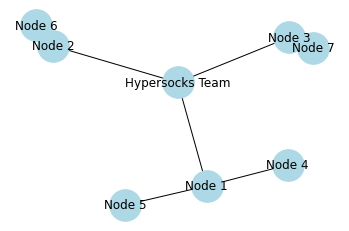

In [11]:
import matplotlib.pyplot as plt
#!pip install networkx
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_node("Hypersocks Team")
G.add_node("Node 1")
G.add_node("Node 2")
G.add_node("Node 3")
G.add_node("Node 4")
G.add_node("Node 5")
G.add_node("Node 6")
G.add_node("Node 7")

# Add edges
G.add_edge("Hypersocks Team", "Node 1")
G.add_edge("Hypersocks Team", "Node 2")
G.add_edge("Hypersocks Team", "Node 3")
G.add_edge("Node 1", "Node 4")
G.add_edge("Node 1", "Node 5")
G.add_edge("Node 2", "Node 6")

# Add edges
G.add_edge("Hypersocks Team", "Node 1")
G.add_edge("Hypersocks Team", "Node 2")
G.add_edge("Hypersocks Team", "Node 3")
G.add_edge("Node 1", "Node 4")
G.add_edge("Node 1", "Node 5")
G.add_edge("Node 3", "Node 7")

# Position nodes using spring layout
pos = nx.spring_layout(G)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue')
nx.draw_networkx_edges(G, pos, arrows=True)
nx.draw_networkx_labels(G, pos)

# Display the plot
plt.axis('off')
plt.show()

In [12]:
#!pip install graphviz
#!pip install pygraphviz
#!pip install viz

In [13]:
# import matplotlib.pyplot as plt
# import networkx as nx


# def lanl_graph():
#     """Return the lanl internet view graph from lanl.edges"""
#     try:
#         fh = open("lanl_routes.edgelist")
#     except OSError:
#         print("lanl.edges not found")
#         raise

#     G = nx.Graph()

#     time = {}
#     time[0] = 0  # assign 0 to center node
#     for line in fh.readlines():
#         (head, tail, rtt) = line.split()
#         G.add_edge(int(head), int(tail))
#         time[int(head)] = float(rtt)

#     # get largest component and assign ping times to G0time dictionary
#     Gcc = sorted(nx.connected_components(G), key=len, reverse=True)[0]
#     G0 = G.subgraph(Gcc)
#     G0.rtt = {}
#     for n in G0:
#         G0.rtt[n] = time[n]

#     return G0


# G = lanl_graph()

# print(G)
# print(nx.number_connected_components(G), "connected components")

# plt.figure(figsize=(8, 8))
# # use graphviz to find radial layout
# pos = nx.nx_agraph.graphviz_layout(G, prog="twopi", root=0)
# # draw nodes, coloring by rtt ping time
# options = {"with_labels": False, "alpha": 0.5, "node_size": 15}
# nx.draw(G, pos, node_color=[G.rtt[v] for v in G], **options)
# # adjust the plot limits
# xmax = 1.02 * max(xx for xx, yy in pos.values())
# ymax = 1.02 * max(yy for xx, yy in pos.values())
# plt.xlim(0, xmax)
# plt.ylim(0, ymax)
# plt.show()

In [14]:
# import matplotlib.pyplot as plt
# import networkx as nx


# def minard_graph():
#     data1 = """\
# 24.0,54.9,340000,A,1
# 24.5,55.0,340000,A,1
# 25.5,54.5,340000,A,1
# 26.0,54.7,320000,A,1
# 27.0,54.8,300000,A,1
# 28.0,54.9,280000,A,1
# 28.5,55.0,240000,A,1
# 29.0,55.1,210000,A,1
# 30.0,55.2,180000,A,1
# 30.3,55.3,175000,A,1
# 32.0,54.8,145000,A,1
# 33.2,54.9,140000,A,1
# 34.4,55.5,127100,A,1
# 35.5,55.4,100000,A,1
# 36.0,55.5,100000,A,1
# 37.6,55.8,100000,A,1
# 37.7,55.7,100000,R,1
# 37.5,55.7,98000,R,1
# 37.0,55.0,97000,R,1
# 36.8,55.0,96000,R,1
# 35.4,55.3,87000,R,1
# 34.3,55.2,55000,R,1
# 33.3,54.8,37000,R,1
# 32.0,54.6,24000,R,1
# 30.4,54.4,20000,R,1
# 29.2,54.3,20000,R,1
# 28.5,54.2,20000,R,1
# 28.3,54.3,20000,R,1
# 27.5,54.5,20000,R,1
# 26.8,54.3,12000,R,1
# 26.4,54.4,14000,R,1
# 25.0,54.4,8000,R,1
# 24.4,54.4,4000,R,1
# 24.2,54.4,4000,R,1
# 24.1,54.4,4000,R,1"""
#     data2 = """\
# 24.0,55.1,60000,A,2
# 24.5,55.2,60000,A,2
# 25.5,54.7,60000,A,2
# 26.6,55.7,40000,A,2
# 27.4,55.6,33000,A,2
# 28.7,55.5,33000,R,2
# 29.2,54.2,30000,R,2
# 28.5,54.1,30000,R,2
# 28.3,54.2,28000,R,2"""
#     data3 = """\
# 24.0,55.2,22000,A,3
# 24.5,55.3,22000,A,3
# 24.6,55.8,6000,A,3
# 24.6,55.8,6000,R,3
# 24.2,54.4,6000,R,3
# 24.1,54.4,6000,R,3"""
#     cities = """\
# 24.0,55.0,Kowno
# 25.3,54.7,Wilna
# 26.4,54.4,Smorgoni
# 26.8,54.3,Moiodexno
# 27.7,55.2,Gloubokoe
# 27.6,53.9,Minsk
# 28.5,54.3,Studienska
# 28.7,55.5,Polotzk
# 29.2,54.4,Bobr
# 30.2,55.3,Witebsk
# 30.4,54.5,Orscha
# 30.4,53.9,Mohilow
# 32.0,54.8,Smolensk
# 33.2,54.9,Dorogobouge
# 34.3,55.2,Wixma
# 34.4,55.5,Chjat
# 36.0,55.5,Mojaisk
# 37.6,55.8,Moscou
# 36.6,55.3,Tarantino
# 36.5,55.0,Malo-Jarosewii"""

#     c = {}
#     for line in cities.split("\n"):
#         x, y, name = line.split(",")
#         c[name] = (float(x), float(y))

#     g = []

#     for data in [data1, data2, data3]:
#         G = nx.Graph()
#         i = 0
#         G.pos = {}  # location
#         G.pop = {}  # size
#         last = None
#         for line in data.split("\n"):
#             x, y, p, r, n = line.split(",")
#             G.pos[i] = (float(x), float(y))
#             G.pop[i] = int(p)
#             if last is None:
#                 last = i
#             else:
#                 G.add_edge(i, last, **{r: int(n)})
#                 last = i
#             i = i + 1
#         g.append(G)

#     return g, c


# (g, city) = minard_graph()

# plt.figure(1, figsize=(11, 5))
# plt.clf()
# colors = ["b", "g", "r"]
# for G in g:
#     c = colors.pop(0)
#     node_size = [G.pop[n] // 300 for n in G]
#     nx.draw_networkx_edges(G, G.pos, edge_color=c, width=4, alpha=0.5)
#     nx.draw_networkx_nodes(G, G.pos, node_size=node_size, node_color=c, alpha=0.5)
#     nx.draw_networkx_nodes(G, G.pos, node_size=5, node_color="k")

# for c in city:
#     x, y = city[c]
#     plt.text(x, y + 0.1, c)
# plt.show()

In [15]:
def generate_fortran_subroutine(subroutine_name, arguments, intent=None):
    """
    Generates a template for a Fortran 2008 subroutine.

    Args:
        subroutine_name (str): Name of the subroutine.
        arguments (list of tuples): List of argument names and types.
                                    Each tuple should be (name, type).
        intent (list of str, optional): List of intents for arguments.
                                         Possible values: "in", "out", "inout".

    Returns:
        str: The generated Fortran subroutine template.
    """
    template = f"subroutine {subroutine_name}("
    
    # Add arguments
    for arg_name, arg_type in arguments:
        if intent and arg_name in intent:
            template += f"{arg_name}, "
        else:
            template += f"{arg_name}, "
    
    # Remove the trailing comma and space
    template = template[:-2] + ")\n"
    
    # Add argument declarations
    for arg_name, arg_type in arguments:
        template += f"    {arg_type}, intent({intent}) :: {arg_name}\n"
    
    # Add subroutine body
    template += "    ! Add subroutine code here\n"
    
    template += "end subroutine\n"
    
    return template

# Example usage
subroutine_name = "my_subroutine"
arguments = [("arg1", "real"), ("arg2", "integer")]
intent = ["in", "out"]  # Intent for each argument, in the same order as arguments

fortran_code = generate_fortran_subroutine(subroutine_name, arguments, intent)
print(fortran_code)


subroutine my_subroutine(arg1, arg2)
    real, intent(['in', 'out']) :: arg1
    integer, intent(['in', 'out']) :: arg2
    ! Add subroutine code here
end subroutine



In [16]:
def generate_fortran_function(function_name, arguments, return_type, description=""):
    """
    Generates a template for a Fortran 2008 function with Doxygen-style documentation.

    Args:
        function_name (str): Name of the function.
        arguments (list of tuples): List of argument names and types.
                                    Each tuple should be (name, type).
        return_type (str): Return type of the function.
        description (str, optional): Description of the function.

    Returns:
        str: The generated Fortran function template.
    """
    # Calculate the maximum length of argument names
    max_arg_length = max(len(arg_name) for arg_name, _ in arguments)
    
    # Generate the function header with Doxygen-style comments
    template = f"!> {description}\n"
    template += "!!\n"
    
    # Generate the function header
    template += f"function {function_name}("
    
    # Add arguments
    for arg_name, arg_type in arguments:
        template += f"{arg_name}, "
    
    # Remove the trailing comma and space
    template = template[:-2] + ") result(result)\n"
    
    # Add argument declarations with Doxygen-style comments
    for arg_name, arg_type in arguments:
        spaces = " " * (max_arg_length - len(arg_name) + 4)  # +4 for ":: "
        template += f"    {arg_type} :: {arg_name}{spaces} !< Description of {arg_name}\n"
    
    # Add result declaration
    template += f"    {return_type} :: result\n"
    
    # Add function body
    template += "    ! Add function code here\n"
    
    template += "end function\n\n"
    
    return template


def generate_fortran_subroutine(subroutine_name, arguments, intent=None, description=""):
    """
    Generates a template for a Fortran 2008 subroutine with aligned :: and Doxygen-style documentation.

    Args:
        subroutine_name (str): Name of the subroutine.
        arguments (list of tuples): List of argument names and types.
                                    Each tuple should be (name, type).
        intent (list of str, optional): List of intents for arguments.
                                         Possible values: "in", "out", "inout".
        description (str, optional): Description of the subroutine.

    Returns:
        str: The generated Fortran subroutine template.
    """
    # Calculate the maximum length of argument names
    max_arg_length = max(len(arg_name) for arg_name, _ in arguments)
    
    # Generate the subroutine header with Doxygen-style comments
    template = f"!> {description}\n"
    template += "!!\n"
    
    # Generate the subroutine header
    template += f"subroutine {subroutine_name}("
    
    # Add arguments
    for arg_name, arg_type in arguments:
        if intent and arg_name in intent:
            template += f"{arg_name}, "
        else:
            template += f"{arg_name}, "
    
    # Remove the trailing comma and space
    template = template[:-2] + ")\n"
    
    # Add argument declarations with Doxygen-style comments
    for arg_name, arg_type in arguments:
        spaces = " " * (max_arg_length - len(arg_name) + 4)  # +4 for ":: "
        template += f"    {arg_type}, intent({intent}) :: {arg_name}{spaces} !< Description of {arg_name}\n"
    
    # Add subroutine body
    template += "    ! Add subroutine code here\n"
    
    template += "end subroutine\n\n"
    
    return template


def generate_fortran_module(module_name, subroutines=None, functions=None, description=""):
    """
    Generates a template for a Fortran 2008 module with Doxygen-style documentation.

    Args:
        module_name (str): Name of the module.
        subroutines (list of str, optional): List of subroutine names.
        functions (list of str, optional): List of function names.
        description (str, optional): Description of the module.

    Returns:
        str: The generated Fortran module template.
    """
    # Generate the module header with Doxygen-style comments
    template = f"module {module_name}\n"
    template += f"!> {description}\n"
    template += "!!\n"
    
    # Add subroutines
    if subroutines:
        for subroutine in subroutines:
            template += f"contains\n"
            template += f"{subroutine}\n\n"
    
    # Add functions
    if functions:
        for function in functions:
            template += f"{function}\n\n"
    
    template += "end module\n\n"
    
    return template


def generate_fortran_program(program_name, uses=None, modules=None, description=""):
    """
    Generates a template for a Fortran 2008 program with Doxygen-style documentation.

    Args:
        program_name (str): Name of the program.
        uses (list of str, optional): List of module names used by the program.
        modules (list of str, optional): List of module names.
        description (str, optional): Description of the program.

    Returns:
        str: The generated Fortran program template.
    """
    # Generate the program header with Doxygen-style comments
    template = f"program {program_name}\n"
    template += f"!> {description}\n"
    template += "!!\n"
    
    # Add "use" statements
    if uses:
        for module in uses:
            template += f"use {module}\n"
    
    # Add modules
    if modules:
        for module in modules:
            template += f"use {module}\n"
    
    template += "implicit none\n\n"
    
    # Add main program body
    template += "    ! Add main program code here\n"
    
    template += "end program\n\n"
    
    return template


# Generate functions, subroutines, modules, and main program
subroutine_name = "my_subroutine"
subroutine_description = "This subroutine does something."
arguments = [("arg1", "real"), ("arg2", "integer")]
intent = ["in", "out"]  # Intent for each argument, in the same order as arguments

fortran_subroutine = generate_fortran_subroutine(subroutine_name, arguments, intent, subroutine_description)

function_name = "my_function"
function_description = "This function calculates something."
return_type = "real"
function_arguments = [("x", "real"), ("y", "real")]

fortran_function = generate_fortran_function(function_name, function_arguments, return_type, function_description)

module_name = "my_module"
module_description = "This module contains subroutines and functions."

fortran_module = generate_fortran_module(module_name, subroutines=[fortran_subroutine], functions=[fortran_function], description=module_description)

program_name = "my_program"
program_description = "This is the main program."
used_modules = ["my_module"]

fortran_program = generate_fortran_program(program_name, uses=used_modules, modules=[module_name], description=program_description)

# Print the generated code
print(fortran_subroutine)
print(fortran_function)
print(fortran_module)
print(fortran_program)


!> This subroutine does something.
!!
subroutine my_subroutine(arg1, arg2)
    real, intent(['in', 'out']) :: arg1     !< Description of arg1
    integer, intent(['in', 'out']) :: arg2     !< Description of arg2
    ! Add subroutine code here
end subroutine


!> This function calculates something.
!!
function my_function(x, y) result(result)
    real :: x     !< Description of x
    real :: y     !< Description of y
    real :: result
    ! Add function code here
end function


module my_module
!> This module contains subroutines and functions.
!!
contains
!> This subroutine does something.
!!
subroutine my_subroutine(arg1, arg2)
    real, intent(['in', 'out']) :: arg1     !< Description of arg1
    integer, intent(['in', 'out']) :: arg2     !< Description of arg2
    ! Add subroutine code here
end subroutine



!> This function calculates something.
!!
function my_function(x, y) result(result)
    real :: x     !< Description of x
    real :: y     !< Description of y
    real :: resu